![Aropython_logo](./static/aeropython_name_mini.png)
###### Carlos Dorado Cárdenas
###### Siro Moreno Martín

# Simplifica tu vida con sistemas complejos y algoritmos genéticos

## Bloque B1: Metaheurística

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random as random

##Ejercicio 1: 

Sin escribir código, haya el valor de _x_ que minimiza el valor de la función _caja_negra_ en el intervalo x ∈ [-20, 20].

In [3]:
from codigo import caja_negra

In [4]:
caja_negra([15.681152720072447])

-10.803884296353758

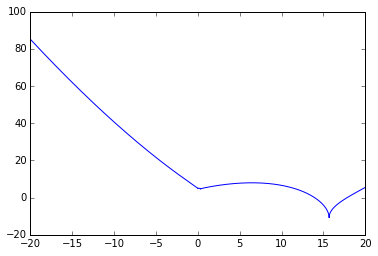

In [5]:
xx = np.linspace(-20, 20, 100000)
yy=[]

for element in xx:
    yy.append(caja_negra([element]))
    
plt.plot(xx,yy)

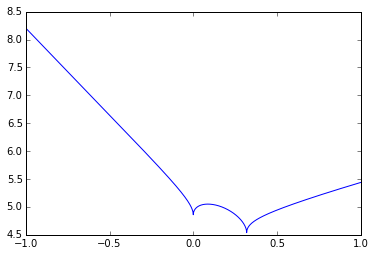

In [6]:
xx = np.linspace(-1, 1, 100000)
yy=[]

for element in xx:
    yy.append(caja_negra([element]))
    
plt.plot(xx,yy)

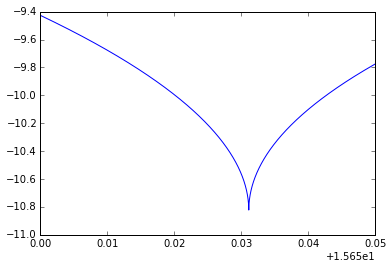

In [7]:
xx = np.linspace(15.65, 15.7, 100000)
yy=[]

for element in xx:
    yy.append(caja_negra([element]))
    
plt.plot(xx,yy)

##Ejercicio 2: 

Usando un algoritmo de búsqueda aleatoria, minimiza la función de Bohachevski en el cuadrado x1, x2 ∈ [-100, 100].

<img src=imagenes/bohachevski.png alt="Función de Bohachevski" style="width: 500px;"/>

In [9]:
from codigo import bohachevski

In [10]:
def produce_random_solution (dimensions, minimum, maximum):
    
    random_solution =[]
    
    while dimensions > 0:

        random_solution.append(minimum + (maximum - minimum) * random.random())
        
        dimensions -= 1
    
    return random_solution

In [11]:
def random_search (number_of_tries, function, dimensions, minimum, maximum):

    best = produce_random_solution (dimensions, minimum, maximum)
    #best = [-2,2]
    best_history = [[best[0]],[best[1]]]
        
    while number_of_tries > 0:
        
        candidate = produce_random_solution (dimensions, minimum, maximum)
    
        if function(candidate)<=function(best):
            best = candidate
            best_history[0].append(best[0])
            best_history[1].append(best[1])
    
        number_of_tries -=1
    
    fig = plt.figure(figsize=(6, 6))
    plt.axis((minimum,maximum,minimum,maximum), fontsize=18)
    plt.xlabel("x1", fontsize=18)
    plt.ylabel("x2", fontsize=18)
    plt.plot(best_history[0], best_history[1])

    return best

[-0.5604041168616476, -0.1026821233835733]

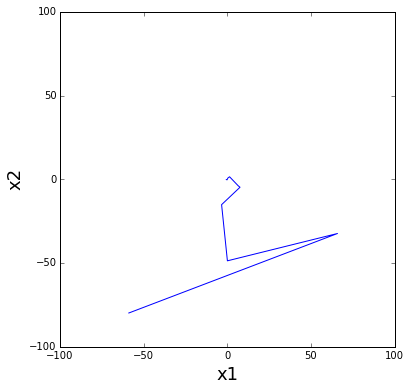

In [12]:
random_search (100000, bohachevski, 2, -100, 100)

##Ejercicio 3: 

Usando un algoritmo de ascenso de colinas, minimiza la función de Bohachevski en el cuadrado x1, x2 ∈ [-100, 100].

In [13]:
def produce_tweaked_solution (solution, tweak_range, minimum, maximum):
    
    tweaked_solution = []
    
    for element in solution:
        
         while True:
                
            change = tweak_range * (random.random()-0.5)
            
            if minimum <= element + change <= maximum:
                tweaked_solution.append(element + change)
                break
                
    return tweaked_solution
    

In [14]:
def hill_climbing (number_of_tries, function, dimensions, minimum, maximum):

    best = produce_random_solution (dimensions, minimum, maximum)
    #best = [-2,2]
    best_history = [[best[0]],[best[1]]]
        
    while number_of_tries > 0:
        
        candidate = produce_tweaked_solution (best, (maximum - minimum)/100, minimum, maximum)
    
        if function(candidate)<=function(best):
            best = candidate
            
            best_history[0].append(best[0])
            best_history[1].append(best[1])
            
        number_of_tries -=1
    
    fig = plt.figure(figsize=(6, 6))
    plt.axis((minimum,maximum,minimum,maximum), fontsize=18)
    plt.xlabel("x1", fontsize=18)
    plt.ylabel("x2", fontsize=18)
    plt.plot(best_history[0], best_history[1])

    return best

[0.0025024609891362015, -0.0025904991866156912]

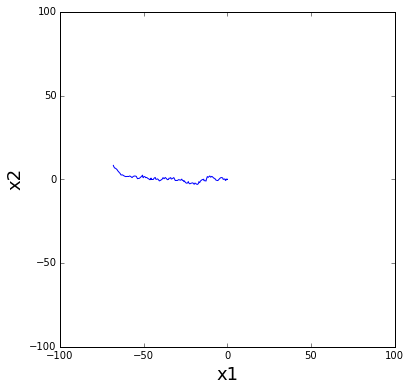

In [15]:
hill_climbing (100000, bohachevski, 2, -100, 100)

##Ejercicio 4: 

Usando ambos tipos de algoritmo, minimiza la función de Easom en el cuadrado x1, x2 ∈ [-100, 100].

<img src=imagenes/easom.png alt="Función de Easom" style="width: 500px;"/>

In [17]:
from codigo import easom

[3.0764993277833383, 2.9410193311177295]

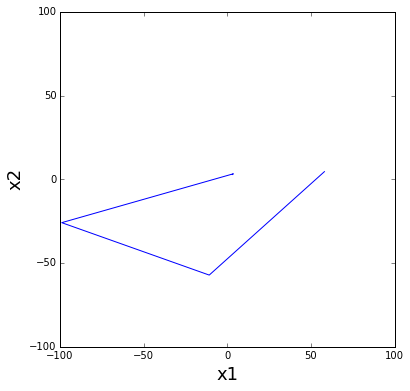

In [18]:
random_search(100000, easom, 2, -100, 100)

[7.952624592816322, 3.151556455595554]

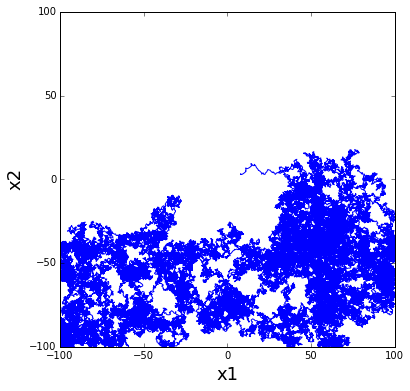

In [19]:
hill_climbing(100000, easom, 2, -100, 100)

##Ejercicio 5: 

Implementa un algoritmo de ascenso de colinas con reinicios aleatorios. Pruébalo con las funciones de Bohachevski e Easom. Minimiza la función de Goldstein-Price en el cuadrado x1, x2 ∈ [-2, 2].

<img src=imagenes/goldstein_price.png alt="Función de Goldstein-Price" style="width: 500px;"/>

In [21]:
from codigo import goldstein_price

In [22]:
def hcrs (number_of_restarts, climbing_tries, function, dimensions, minimum, maximum):
    
    best = []
    candidate_history = [[],[]]
    best_history = [[],[]]
       
    while number_of_restarts > 0:
        
        candidate = produce_random_solution (dimensions, minimum, maximum)
        candidate_history[0].append(candidate[0])
        candidate_history[1].append(candidate[1])
        
        run_tries = climbing_tries
        
        while run_tries > 0:
            
            candidate_tweaked = produce_tweaked_solution (candidate, (maximum - minimum)/100, minimum, maximum)
            if function(candidate_tweaked)<=function(candidate):
                candidate = candidate_tweaked
                candidate_history[0].append(candidate[0])
                candidate_history[1].append(candidate[1])
                
            run_tries -= 1
                        
        if best == [] or function(candidate)<=function(best):
            best = candidate
            best_history[0].append(best[0])
            best_history[1].append(best[1])
        
        number_of_restarts -=1
                   
   
    fig = plt.figure(figsize=(6, 6))
    plt.axis((minimum,maximum,minimum,maximum), fontsize=18)
    plt.xlabel("x1", fontsize=18)
    plt.ylabel("x2", fontsize=18)
    plt.plot(candidate_history[0], candidate_history[1])
  
            
    return best

[-0.003262564336428353, -0.9885619434861828]

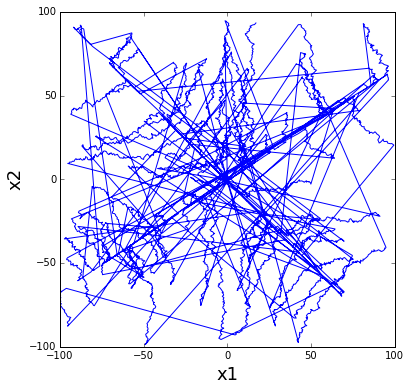

In [23]:
hcrs (100, 1000, goldstein_price, 2, -100, 100)

[-0.000629782851533589, -0.0006033493349748564]

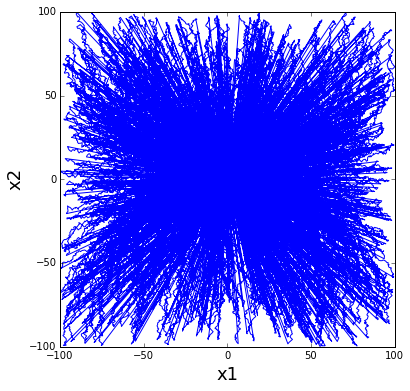

In [24]:
hcrs (1000, 1000, bohachevski, 2, -100, 100)

[3.1443815520768883, 3.141510024448782]

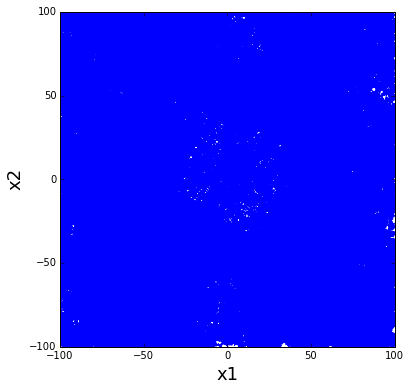

In [25]:
hcrs (1000, 1000, easom, 2, -100, 100)

In [26]:
from IPython.display import HTML

HTML('<iframe src="http://www.psychicorigami.com/2007/04/17/tackling-the-travelling-salesman-problem-part-one/" width="800" height="1000"></iframe>')

Si te está gustando este taller:

In [1]:
%%html
<a href="https://twitter.com/share" class="twitter-share-button" data-url="https://github.com/AeroPython/Taller-Algoritmos-Geneticos-PyConEs16" data-text="Aprendiendo Algoritmos Genéticos y Sistemas Complejos con" data-via="AeroPython" data-size="large" data-hashtags="PyConEs" data-dnt="true">Tweet</a>
<script>!function(d,s,id){var js,fjs=d.getElementsByTagName(s)[0],p=/^http:/.test(d.location)?'http':'https';if(!d.getElementById(id)){js=d.createElement(s);js.id=id;js.src=p+'://platform.twitter.com/widgets.js';fjs.parentNode.insertBefore(js,fjs);}}(document, 'script', 'twitter-wjs');</script>

Carlos Dorado, Aeropython, 7 de Octubre de 2016

In [2]:
# Notebook style
from IPython.core.display import HTML
css_file = './static/style.css'
HTML(open(css_file, "r").read())